### Evaluation measures for multi-class classification

#### Multi-class confusion matrix

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>


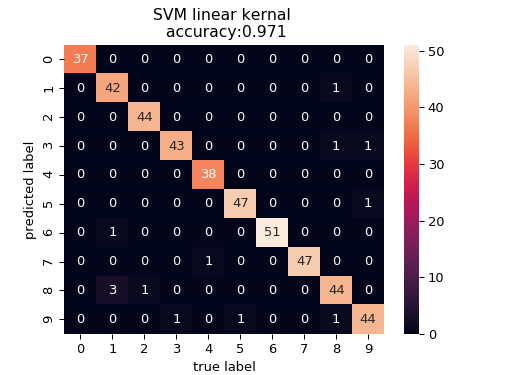

Text(39.47222222222222, 0.5, 'predicted label')

In [19]:
from sklearn.svm import SVC
dataset=load_digits()
x,y=dataset.data,dataset.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
svm=SVC(kernel="linear").fit(x_train,y_train)
svm_predicted=svm.predict(x_test)
cm=confusion_matrix(y_test,svm_predicted)
df_cm=pd.DataFrame(cm,index=[i for i in range(10)],columns=[i for i in range(10)])
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,annot=True)
plt.title("SVM linear kernal \n accuracy:{0:.3f}".format(accuracy_score(y_test,svm_predicted)))
plt.xlabel("true label")
plt.ylabel("predicted label")

<IPython.core.display.Javascript object>


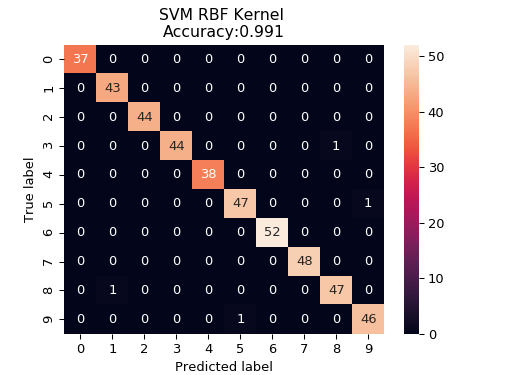

In [20]:
svm = SVC(kernel = 'rbf').fit(x_train, y_train)
svm_predicted_mc = svm.predict(x_test)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro- vs. macro-averaged metrics

In [5]:
from sklearn.metrics import precision_score
print("micro-averaged precision={:.2f}(treat instances equally)".format(precision_score(y_test,svm_predicted,average="micro")))
print("macro averaged precision={:.2f}(treat classes equally)".format(precision_score(y_test,svm_predicted,average="macro")))

micro-averaged precision=0.97(treat instances equally)
macro averaged precision=0.97(treat classes equally)


In [6]:
from sklearn.metrics import f1_score
print("micro-averaged precision={:.2f}(treat instances equally)".format(f1_score(y_test,svm_predicted,average="micro")))
print("macro averaged precision={:.2f}(treat classes equally)".format(f1_score(y_test,svm_predicted,average="macro")))

micro-averaged precision=0.97(treat instances equally)
macro averaged precision=0.97(treat classes equally)


### Regression evaluation metrics


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.dummy import DummyRegressor
from sklearn import datasets
diabetes=datasets.load_diabetes()

In [8]:
x=diabetes.data[:,None,6]
y=diabetes.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lm=LinearRegression().fit(x_train,y_train)
lm_dummy_mean=DummyRegressor(strategy="mean").fit(x_train,y_train)
y_predict_dummy_mean = lm_dummy_mean.predict(x_test)
y_predict=lm.predict(x_test)

In [9]:
print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


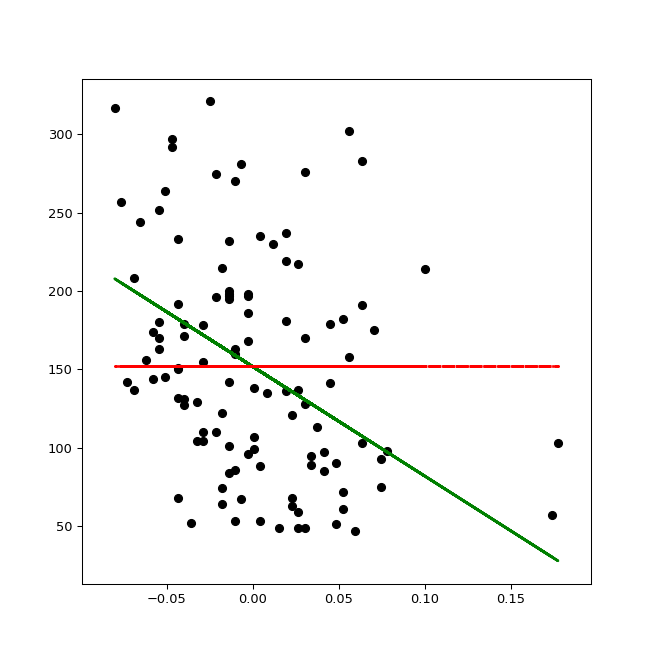

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predict, color='green', linewidth=2)
plt.plot(x_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

#### Cross-validation example

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
datasets=load_digits()
x,y=datasets.data,datasets.target==1
clf=SVC(kernel="linear",C=1)
print("cross validation score",cross_val_score(clf,x,y,cv=5))
print("cross-validation(AUC)",cross_val_score(clf,x,y,cv=5,scoring="roc_auc"))
print("cross-validation (recall)",cross_val_score(clf,x,y,cv=5,scoring="recall"))

cross validation score [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
cross-validation(AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

In [28]:
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dataset=load_digits()
x,y=dataset.data,dataset.target==1
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [29]:
clf=SVC(kernel="rbf")
grid_values={"gamma":[0.001,0.01,0.05,0.1,1,10,100]}
grid_clf_acc=GridSearchCV(clf,param_grid=grid_values)
grid_clf_acc.fit(x_train,y_train)
y_decision_fn_scores_acc=grid_clf_acc.decision_function(x_test)

In [30]:
print("grid best parameter (max.accuracy)",grid_clf_acc.best_params_)

grid best parameter (max.accuracy) {'gamma': 0.001}


In [31]:
print("grid best score (accuracy)",grid_clf_acc.best_score_)

grid best score (accuracy) 0.997034283353986


In [32]:
grid_clf_auc=GridSearchCV(clf,param_grid=grid_values,scoring="roc_auc")
grid_clf_auc.fit(x_train,y_train)
y_decision_fn_scores_auc=grid_clf_auc.decision_function(x_test)

In [34]:
print("test set auc",roc_auc_score(y_test,y_decision_fn_scores_auc))
print("grid best parameter (max.AUC)",grid_clf_auc.best_params_)
print("grid best score(auc)",grid_clf_auc.best_score_)

test set auc 1.0
grid best parameter (max.AUC) {'gamma': 0.001}
grid best score(auc) 0.9999695168419448


In [35]:
from sklearn.metrics.scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

In [38]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

dataset=load_digits()
x,y=dataset.data,dataset.target==1
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [40]:
clf=SVC(kernel="linear").fit(x_train,y_train)
grid_values={"class_weight":["balanced",{1:2},{1:3},{1:4},{1:5},{1:6},{1:10},{1:20},{1:50}]}
#plt.figure(figsize=(7,7))
for i,eval_metric in enumerate(("precision","recall","f1","roc_auc")):
    grid_clf_custom=GridSearchCV(clf,param_grid=grid_values,scoring=eval_metric)
    grid_clf_custom.fit(x_train,y_train)
    print("grid best parameter (max.{0}):{1}".format(eval_metric,grid_clf_custom.best_params_))
    print("grid best score ({0}): {1}".format(eval_metric,grid_clf_custom.best_score_))

grid best parameter (max.precision):{'class_weight': 'balanced'}
grid best score (precision): 0.878993746993747
grid best parameter (max.recall):{'class_weight': 'balanced'}
grid best score (recall): 0.898941798941799
grid best parameter (max.f1):{'class_weight': 'balanced'}
grid best score (f1): 0.8870188796626289
grid best parameter (max.roc_auc):{'class_weight': 'balanced'}
grid best score (roc_auc): 0.993653029912932


In [44]:
from sklearn.metrics import precision_recall_curve
dataset=load_digits()
x,y=dataset.data,dataset.target==1
x_train,x_test,y_train,y_test=train_test_split(x,y)
clf=SVC(kernel="linear",class_weight="balanced").fit(x_train,y_train)
y_scores=clf.decision_function(x_test)
p,r,t=precision_recall_curve(y_test,y_scores)

In [47]:
closest_zero=np.argmin(np.abs(t))
closest_zero_p=p[closest_zero]
closest_zero_r=r[closest_zero]

<IPython.core.display.Javascript object>


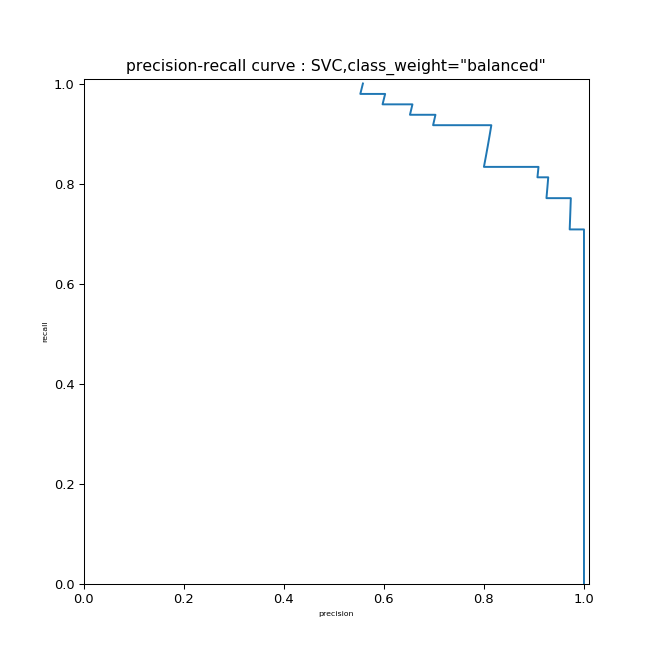

at zero threshold,precision: 0.80,recall: 0.83


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [49]:
plt.figure(figsize=(7,7))
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.title('precision-recall curve : SVC,class_weight="balanced"')
plt.plot(p,r,label="precision-recall-curve")
plt.xlabel("precision",fontsize=6)
plt.ylabel("recall",fontsize=6)
plt.axes().set_aspect("equal")
plt.show()
print("at zero threshold,precision: {:.2f},recall: {:.2f}".format(closest_zero_p,closest_zero_r))